# Dev notes/code

In [1]:
import ising_conway

import numpy as np
from numpy.random import randint
from numpy.random import choice
from numpy import zeros, where
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
plt.rcParams["figure.autolayout"] = True

In [ ]:
dynamic_evolution, omega_t = ising_conway.play(100, 30, nstep=400, beta=3.1, dynamic_type="metropolis")

In [ ]:

font = {"family": "monospace", "weight": "bold", "size": 24}
plt.ioff()
plt.rc("font", **font)
plt.matshow(np.array(dynamic_evolution).transpose(), cmap=plt.cm.binary)
plt.xlabel("Time step", **font)
plt.ylabel("Site Id", **font)
plt.title("Diffusion over time ")
# if plot_eps:
#     plt.savefig("ising_conway.eps", format="eps", dpi=60, bbox_inches="tight")
# plt.savefig("ising_conway.png", format="png", bbox_inches="tight")
# #plt.show()
# plt.close('all')
plt.show()
    

In [ ]:
# Visualize dynamic_evolution
seed = 42424242
nstep = 50000
dynamic_evolution, _ = ising_conway.play(100, 20, nstep=nstep, beta=0.6, dynamic_type="glauber", seed=seed)
de = np.array(dynamic_evolution)
i_i = 0
i_f = 2500
delta = 2500
vs = []
for _ in range(20):
    vs.append(de[i_i:i_f])
    i_i = i_i + delta
    i_f = i_f + delta
de2 = np.hstack(vs)


font = {"family": "monospace", "weight": "bold", "size": 14}
plt.ioff()
plt.rc("font", **font)
plt.matshow(np.array(de2).transpose(),cmap=plt.cm.Blues)
plt.xticks([])
plt.yticks([])
plt.title(r"Typical Glauber Trajectories \\    100/20 Game: Evolution (Stacked) \\ Temperature $\beta=0.6$")
plt.show()

In [ ]:
# Visualize dynamic_evolution
seed = 424242
nstep = 50000
dynamic_evolution, _ = ising_conway.play(150, 45, nstep=nstep, beta=0.9, dynamic_type="metropolis", seed=seed)
de = np.array(dynamic_evolution)
i_i = 0
i_f = 4500
delta = 4500
vs = []
for _ in range(10):
    vs.append(de[i_i:i_f])
    i_i = i_i + delta
    i_f = i_f + delta
de2 = np.hstack(vs)


font = {"family": "monospace", "weight": "bold", "size": 14}
plt.ioff()
plt.rc("font", **font)
plt.matshow(np.array(de2).transpose(),cmap=plt.cm.Blues)
plt.xticks([])
plt.yticks([])
plt.title(r"Typical Metropolis Trajectories \\ 150/45 Game: Evolution (Stacked) \\ Temperature $\beta=0.9$")
plt.show()

In [32]:

ot1 = []
ot2 = []
ot3 = []
for _ in range(30):
    sq1 = np.random.SeedSequence()
    seed = abs(int(sq1.entropy/2**100))
    nstep = 10000
    dynamic_evolution, omega_t1 = ising_conway.play(100, 15, nstep=nstep, beta=0.1, dynamic_type="metropolis", seed=seed)
    dynamic_evolution, omega_t2 = ising_conway.play(100, 15, nstep=nstep, beta=0.3, dynamic_type="metropolis", seed=seed)
    dynamic_evolution, omega_t3 = ising_conway.play(100, 15, nstep=nstep, beta=0.6, dynamic_type="metropolis", seed=seed)

    ot1.append(omega_t1)
    ot2.append(omega_t2)
    ot3.append(omega_t3)
    

In [33]:
o1 = np.array(ot1).mean(axis=0)
o2 = np.array(ot2).mean(axis=0)
o3 = np.array(ot3).mean(axis=0)

In [34]:
base_ = np.sum(o1) # Entropy production rate beta=0.3
np.sum(o2)/base_, np.sum(o3)/base_, 

(1.2245356801269731, 1.2368698494857997)

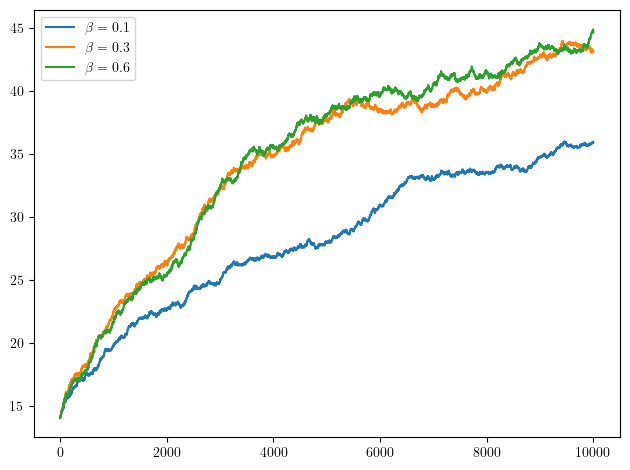

In [35]:
plt.plot(o1, label=r"$\beta=0.1$")
plt.plot(o2, label=r"$\beta=0.3$")
plt.plot(o3, label=r"$\beta=0.6$")
plt.legend(loc="upper left")
plt.show()

* Entropy production, ratio to reference trajectory (Area under Entropy evolution) (1 Figure, 4 curves 2 sizes-Glauber/Metropolis))

In [3]:
data_4 = ising_conway.generate_entropy_production(N=150, M=45, nstep=5000, nrepeat=50, beta=0.4, dynamics="glauber")
data_9 = ising_conway.generate_entropy_production(N=150, M=45, nstep=5000, nrepeat=50, beta=0.9, dynamics="glauber")

In [4]:
data_1 = ising_conway.generate_entropy_production(N=150, M=45, nstep=5000, nrepeat=50, beta=0.01, dynamics="glauber")

In [ ]:
data_4['entropy_product_mean']

In [ ]:
plt.plot(data_1['entropy_product_mean'], label="0.01")
plt.plot(data_4['entropy_product_mean'], label="0.4")
plt.plot(data_9['entropy_product_mean'], label="0.9")
plt.legend()
plt.show()

In [ ]:
np.random.random()

In [ ]:
import dill

data = dill.load(open("data_entropy_production.dill", "rb"))
sim_params = data['sim_params']
sim_results = data['sim_results']
for dynamics in sim_params["dynamics"]:
    for beta in sim_params["betas"]:
        for N_M in sim_params["N_M"]:
            print(f"N {N_M[0]} M {N_M[1]} dynamics {dynamics} beta {beta}")
            

In [8]:
#{"dynamics": ["metropollis", "glauber"],
#        "betas": [0.001, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9], "N_M", [[100,20], [150, 45]], "nrepeat":30, "nstep":80000}
sim_params = {"dynamics": ["metropolis", "glauber"],
        "betas": [0.001], "N_M": [[100,20]], "nrepeat":1, "nstep":10}
data_set = ising_conway.generate_data_set(sim_params)

# Analysis

In [1]:
import dill
import ising_conway

import numpy as np
from numpy.random import randint
from numpy.random import choice
from numpy import zeros, where
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
plt.rcParams["figure.autolayout"] = True

data = dill.load(open("data_entropy_production.dill", "rb"))

In [2]:
params = data['sim_params']
sim_results = data['sim_results']


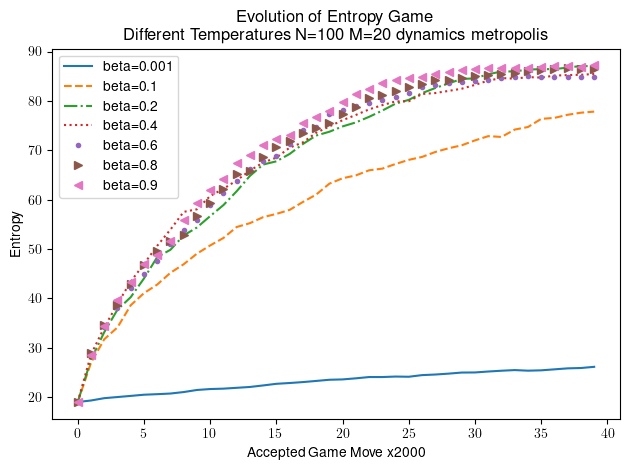

In [3]:
def plot_entropy_from_sim_results_betas(sim_results, N, M, dynamics, spacing=2000):
    styles = iter(['-', '--', '-.', ':', '.', '>', '<', '*', 'x', '!', 'o'])
    for res in sim_results:
        if res['N'] == N and res['M'] == M and res['dynamics'] == dynamics:
            plt.plot(res['entropy_product_mean'][::spacing], next(styles), label=f"beta={res['beta']}")
    plt.legend()
    plt.xlabel(f"Accepted Game Move x{spacing}")
    plt.ylabel("Entropy")
    plt.title(f"Evolution of Entropy Game \n Different Temperatures N={N} M={M} dynamics {dynamics}")
    plt.savefig(f"entropy_N{N}M{M}dynamics{dynamics}.png", format="png", bbox_inches="tight")  
    
N=100 
M=20
dynamics='metropolis'    
plot_entropy_from_sim_results_betas(sim_results, N, M, dynamics)

In [ ]:
from matplotlib import lines
lines.lineStyles.keys()

In [ ]:
styles = iter(['-', '--', '-.', ':', '.', ',', 'o', 'v', '^', '<', '>'])
next(styles)

In [ ]:
np.array(range(10))[::2]

In [ ]:
# Entropy production, ratio to reference trajectory (Area under Entropy evolution: Align to reference) (1 Figure, 4 curves 2 sizes-Glauber/Metropolis))

In [4]:
def get_entropy_production_from_sim_results(sim_results, N, M, dynamics):
    """ Get entropy production.  """
    entropy_beta = []
    for res in sim_results:
        if res['N'] == N and res['M'] == M and res['dynamics'] == dynamics:
            entropy_beta.append((res['beta'], res['entropy_product_mean']))
    betas = [beta[0] for beta in entropy_beta]
    align_length = np.min([len(beta[1]) for beta in entropy_beta])
    entropy_curves = [data[1][:align_length] for data in entropy_beta]
    entropy_prod = [np.sum(ec) for ec in entropy_curves]
    return betas, entropy_prod/entropy_prod[0]


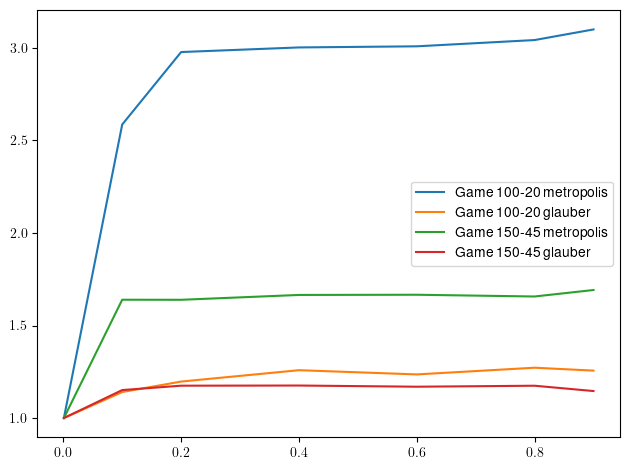

In [5]:
N=100 
M=20
dynamics='metropolis'    
betas, entropy_production  = get_entropy_production_from_sim_results(sim_results, N, M, dynamics)
plt.plot(betas, entropy_production, label=f"Game {N}-{M} {dynamics}")
N=100 
M=20
dynamics='glauber'    
betas, entropy_production  = get_entropy_production_from_sim_results(sim_results, N, M, dynamics)
plt.plot(betas, entropy_production, label=f"Game {N}-{M} {dynamics}")

N=150 
M=45
dynamics='metropolis'    
betas, entropy_production  = get_entropy_production_from_sim_results(sim_results, N, M, dynamics)
plt.plot(betas, entropy_production, label=f"Game {N}-{M} {dynamics}")
N=150 
M=45
dynamics='glauber'    
betas, entropy_production  = get_entropy_production_from_sim_results(sim_results, N, M, dynamics)
plt.plot(betas, entropy_production, label=f"Game {N}-{M} {dynamics}")


plt.legend()